# Notebook Networkx

In [1]:
# !pip install seaborn

In [11]:
from __future__ import print_function, division

import pandas as pd
import networkx as nx
from networkx.drawing.nx_pydot import write_dot
import matplotlib.pyplot as plt
from matplotlib import patches

import seaborn as sns
import operator
import numpy as np
sns.set_context('notebook', font_scale=1.5)
sns.set_style('white')

%matplotlib inline

In [31]:
graph_path = "/Dataset-Bitcoin.csv"

In [32]:
dataset = pd.read_csv(graph_path)

In [33]:
def make_graph_filtered(df, min_edges=0):
    DG = nx.Graph()
    DG.add_nodes_from(df.package_name.unique())
    edges = df.loc[df.requirement.notnull(), ['package_name', 'requirement']].values
    DG.add_edges_from(edges)
    # Remove bad nodes
    DG.remove_nodes_from(['.', 'nan', np.nan])
    deg = DG.degree()
    to_remove = [n for n in deg if deg[n] <= min_edges]
    DG.remove_nodes_from(to_remove)
    return DG

In [34]:
def make_graph(df):
    DG = nx.Graph()
    DG.add_nodes_from(df['from'].unique())
    edges = df.loc[df['to'].notnull(), ['from', 'to']].values
    DG.add_edges_from(edges)
    # Remove bad nodes
    DG.remove_nodes_from(['.', 'nan', np.nan])
    return DG

In [35]:
def make_graph_bck(df):
    DG = nx.Graph()
    DG.add_nodes_from(df.package_name.unique())
    edges = df.loc[df.requirement.notnull(), ['package_name', 'requirement']].values
    DG.add_edges_from(edges)
    # Remove bad nodes
    DG.remove_nodes_from(['.', 'nan', np.nan])
    return DG

In [36]:
dep_graph = make_graph(dataset)

In [37]:
def print_basic_info(graph):
    print(f"Nodes: {graph.number_of_nodes()}")
    print(f"Edges: {graph.number_of_edges()}")
    print(f"Transitivity: {nx.transitivity(dep_graph)}")
    

In [38]:
print_basic_info(dep_graph)

Nodes: 3783
Edges: 14124
Transitivity: 0.0780073665603234


## Degree Distribution 

In [39]:
def plot_degree_dist(graph, name):
    degrees = [graph.degree(n) for n in graph.nodes()]
    degree_freq = nx.degree_histogram(dep_graph)
    bins=30
    fig, ax = plt.subplots(1, 1, figsize=(11,4))
    ax.hist(degrees, bins=bins)
    ax.plot(ax.get_xlim(), [1, 1], 'k--', alpha=0.5)
    ax.set_xlabel('Degree')
    ax.set_ylabel('Frequency')
    ax.set_title('Degree Distribution')
    ax.set_yscale('log')
    ax.set_ylim((0.5, max(degree_freq) *10))
    fig.subplots_adjust(left=0.1, bottom=0.15)
    fig.savefig(f'Plots/{name}_Degree_Distribution.png')

In [40]:
graph_name = graph_path.split('/')[-1].split('.csv')[0]

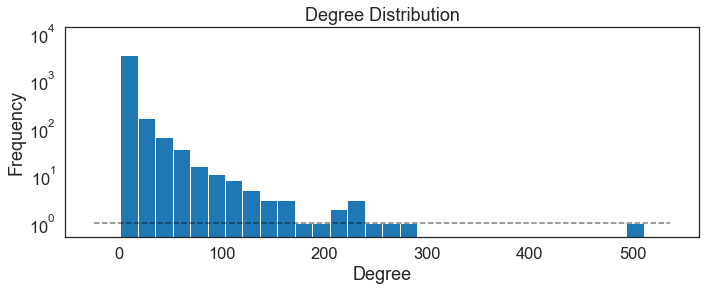

In [41]:
plot_degree_dist(dep_graph, graph_name)

In [42]:
def plot_degree_dist_alt(graph, name):
    degree_freq = nx.degree_histogram(graph)
    degrees = range(len(degree_freq))
    plt.figure(figsize=(8, 8)) 
    plt.loglog(degrees, degree_freq,'o-',markevery=0.1) 
    plt.title("Degree Distribution")
    plt.xlabel('Degree')
    plt.ylabel('Frequency')
    plt.savefig(f'Plots/{name}_DegreeDistribution_V2.png')

plot_degree_dist_alt(dep_graph, "Python_Dependency")

## Degree Assortativity

In [43]:
def assortativity(graph):
    degree_assortativity_coefficient = nx.degree_assortativity_coefficient(graph)
    degree_degree_pearson_correlation_coefficient = nx.degree_pearson_correlation_coefficient(graph)
    print(f"Degree Assortativity: {degree_assortativity_coefficient}")
    print(f"Degree Assortativity Pearson: {degree_degree_pearson_correlation_coefficient}")

In [44]:
assortativity(dep_graph)

Degree Assortativity: -0.16851576112150454
Degree Assortativity Pearson: -0.16851576112150204


In [45]:
def distribution_results(array_list, feature):
    array = np.array(array_list)
    array = array[np.logical_not(np.isnan(array))]
    min_val = np.min(array)
    max_val = np.max(array)
    mean_val = np.mean(array)
    median_val = np.median(array)
    std_val = np.std(array)
    print(f"{feature}: {min_val} & {max_val} & {mean_val} & {median_val} & {std_val}")

In [46]:
# def betweeness(graph):
#     betweenness_centrality_array = nx.betweenness_centrality(graph)
#     distribution_results(betweenness_centrality_array, "Betweenness")

## Connected Components

In [47]:
connected_components = [len(c) for c in sorted(nx.connected_components(dep_graph), key=len, reverse=True)]
print(f"Connected Components: {nx.number_connected_components(dep_graph)}")

Connected Components: 5


In [48]:
distribution_results(connected_components, "Connected Components")

Connected Components: 2 & 3775 & 756.6 & 2.0 & 1509.2


In [49]:
# plot_distance_distribution(dep_graph)

In [50]:
connected_components

[3775, 2, 2, 2, 2]

In [52]:
val = nx.connected_components(dep_graph)

In [55]:
next(val)

{1389, 3388}